# Transfer Learning

## Learning Objectives
* See transfer learning in action

## Activity Instructions
1. Get my code running for your own system. This will require some tweaking as your filesystem structure will be different from my own. You'll also have to get the dataset downloaded and uploaded. 
2. Now that you have it running. How are you doing? Is the training and testing accuracy similar? Did you add in data augmentation in the transforms? Stay on this step until your training and testing accuracies are relatively similar.
3. If you reach step 3, awesome! What if you increase the size of the training dataset? What if you change the last layer to something else? How would you decide when to stop?

Extra credit. I'll give some extra credit if you make a hotdog/not hotdog app as seen on Silicon Valley :) This is outside of class of course. 

## Submission Instructions
**After completing the assignments, please upload a PDF output of this notebook.**

This is an individual assignment, but you may discuss your code with your neighbors.

## Model

Let's start with resnet18. You can read more about resnet18 from https://www.kaggle.com/datasets/pytorch/resnet18 and https://arxiv.org/pdf/1512.03385.pdf. Please take a moment and read a little about the model and its history.

In [2]:
from torchvision.models.googlenet import googlenet
import torch
import torchvision
from torchvision import datasets

from torchvision.models import resnet18, ResNet18_Weights
# here we load the pre-trained model
model = resnet18(weights=ResNet18_Weights.DEFAULT)
# model = googlenet(weights=torchvision.models.GoogLeNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to //home/lreyna/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 63.3MB/s]


OSError: [Errno 122] Disk quota exceeded

In [ ]:
# Check out the architecture
print(model)

## Dataset

We need a dataset of images. You will need to download the following dataset to your local computer: https://www.kaggle.com/datasets/thedatasith/hotdog-nothotdog?resource=download. Unzip the file and check out the structure of train/test.

Let's see how we can do with a small number of images of hotdogs and not hotdogs. I am storing my images on my server. Please store your images somewhere that works for your system. We are also going to want 10 images of test hotdogs and 10 images of test not hotdogs. You can change these numbers if you would like.

In [ ]:
# !mkdir -p $HOME/hotdog-nothotdog/train/hotdog
# !mkdir -p $HOME/hotdog-nothotdog/train/nothotdog
# !mkdir -p $HOME/hotdog-nothotdog/test/hotdog
# !mkdir -p $HOME/hotdog-nothotdog/test/nothotdog

Here you just need to manually upload some images into those directories. Drag and drop away :)

After you do that, you'll want to define the locations in Python. For me that works as follows:

In [5]:
home = '/content/drive/Othercomputers/MacBookPro20/csc-487-lucas/data'

train_dir = f"{home}/hotdog-nothotdog-full/train/"
test_dir = f"{home}/hotdog-nothotdog-full/test/"
train_classa_dir = f"{train_dir}/hotdog"
train_classb_dir = f"{train_dir}/nothotdog"
test_classa_dir = f"{test_dir}/hotdog"
test_classb_dir = f"{test_dir}/nothotdog"

We need to load the dataset with torchvision.dataset and using the ImageFolder function. To do this, we'll need to define transforms that will format the load the data in a manner that works with our pre-trained model. For example, resnet18 accepts images of 64x64. We can define our own transforms, but PyTorch comes with associated transforms.

In [6]:
from torchvision.models import ResNet18_Weights

#weights = ResNet18_Weights.DEFAULT
weights = torchvision.models.GoogLeNet_Weights.DEFAULT
preprocess = weights.transforms()

In [7]:
import torchvision.transforms as transforms 

# define augmentation pipelines
train_tansform = transforms.Compose([
    # After running once, comment out this line and add in the following three lines.
    # Why does this make a difference?
    #transforms.Resize((64, 64)), 
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_ransform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [24]:
import random

subset_size = 75
training_batchsize = 50

def random_indices(dataset, batch_size):
  return [random.choice(range(len(dataset))) for _ in range(batch_size)]

train_dataset = datasets.ImageFolder(train_dir, train_tansform)

train_dataset = torch.utils.data.Subset(train_dataset, random_indices(train_dataset, subset_size))

test_dataset = datasets.ImageFolder(test_dir, test_ransform)
test_dataset = torch.utils.data.Subset(test_dataset, random_indices(test_dataset, subset_size))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=training_batchsize, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=False)

We can check the sizes of our datasets and make sure it checks out:

In [26]:
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))
class_names = train_dataset.dataset.classes
print('Class names:', class_names)

Train dataset size: 75
Test dataset size: 400
Class names: ['hotdog', 'nothotdog']


Let's look at some of our images.

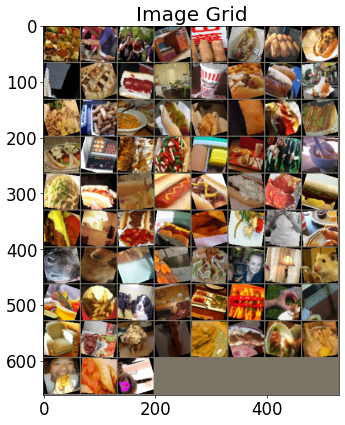

['nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'nothotdog', 'hotdog', 'nothotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'hotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'hotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog', 'nothotdog', 'hotdog', 'nothotdog', 'nothotdog', 'hotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog', 'nothotdog', 'hotdog', 'nothotdog', 'hotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'nothotdog', 'hotdog', 'hotdog', 'nothotdog']


In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()
# load a batch of train image
iterator = iter(train_dataloader)
# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:training_batchsize])
imshow(out, title="Image Grid")

print([class_names[x] for x in classes[:training_batchsize]])

Now we can train our classifier. We need to replace the final layer with a new layer that has unfrozen weights.

In [32]:
params_not_frozen = []
for param in model.parameters():
    if param.requires_grad == True:
        params_not_frozen.append(param)
print("We have a lot of layers that are not frozen:",len(params_not_frozen))

We have a lot of layers that are not frozen: 173


In [33]:
# Make sure our parameters are frozen
for param in model.parameters():
    param.requires_grad = False

In [34]:
import torch.nn as nn
num_features = model.fc.in_features     #extract fc layers features
print('num_features',num_features)
model.fc = nn.Linear(num_features, 2) #(num_of_class == 2) - here is the magic. 

num_features 1024


In [35]:
params_not_frozen = []
for param in model.parameters():
    if param.requires_grad == True:
        params_not_frozen.append(param)
print("Now only our last layer is not frozen:",len(params_not_frozen))

# The value of two is from the bias. Here are the values:
print(params_not_frozen)

Now only our last layer is not frozen: 2
[Parameter containing:
tensor([[ 0.0053,  0.0246,  0.0256,  ..., -0.0263,  0.0272,  0.0294],
        [-0.0194,  0.0270,  0.0187,  ..., -0.0106, -0.0139,  0.0259]],
       requires_grad=True), Parameter containing:
tensor([0.0090, 0.0067], requires_grad=True)]


Let's do some training!

In [36]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50   #(set no of epochs)
for epoch in range(num_epochs): #(loop for every epoch)
    print("Epoch {} running".format(epoch)) #(printing message)
    """ Training Phase """
    model.train()    #(training model)
    running_loss = 0.   #(set loss 0)
    running_corrects = 0 
    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):
        # forward inputs and get output
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # get loss value and update the network weights
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset) * 100.
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}%'.format(epoch, epoch_loss, epoch_acc))
    
    """ Testing Phase """
    model.eval()
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = running_corrects / len(test_dataset) * 100.
        print('[Test #{}] Loss: {:.4f} Acc: {:.4f}%'.format(epoch, epoch_loss, epoch_acc))

Epoch 0 running
[Train #0] Loss: 0.8361 Acc: 46.6667%
[Test #0] Loss: 0.7789 Acc: 50.5000%
Epoch 1 running
[Train #1] Loss: 0.7913 Acc: 48.0000%
[Test #1] Loss: 0.7561 Acc: 52.2500%
Epoch 2 running
[Train #2] Loss: 0.8440 Acc: 41.3333%
[Test #2] Loss: 0.7376 Acc: 53.5000%
Epoch 3 running
[Train #3] Loss: 0.7540 Acc: 50.6667%
[Test #3] Loss: 0.7279 Acc: 54.2500%
Epoch 4 running
[Train #4] Loss: 0.7046 Acc: 56.0000%
[Test #4] Loss: 0.7208 Acc: 55.2500%
Epoch 5 running
[Train #5] Loss: 0.7087 Acc: 46.6667%
[Test #5] Loss: 0.7154 Acc: 54.5000%
Epoch 6 running
[Train #6] Loss: 0.7580 Acc: 49.3333%
[Test #6] Loss: 0.7078 Acc: 56.5000%
Epoch 7 running
[Train #7] Loss: 0.7057 Acc: 58.6667%
[Test #7] Loss: 0.7069 Acc: 56.2500%
Epoch 8 running
[Train #8] Loss: 0.7398 Acc: 48.0000%
[Test #8] Loss: 0.7029 Acc: 56.7500%
Epoch 9 running
[Train #9] Loss: 0.7369 Acc: 50.6667%
[Test #9] Loss: 0.6990 Acc: 57.2500%
Epoch 10 running
[Train #10] Loss: 0.7514 Acc: 38.6667%
[Test #10] Loss: 0.6942 Acc: 56.75

In [37]:
import datetime

# save the model
model_folder_path = "/content/drive/Othercomputers/MacBookPro20/csc-487-lucas/models"
model_file_path = f"{model_folder_path}/hotdog_{str(datetime.datetime.now())}"
torch.save(model.state_dict(), model_file_path)

In [43]:
# Model class must be defined somewhere

loaded_model = googlenet()
num_features = loaded_model.fc.in_features     #extract fc layers features
loaded_model.fc = nn.Linear(num_features, 2)
loaded_model.load_state_dict(torch.load("/content/drive/Othercomputers/MacBookPro20/csc-487-lucas/models/hotdog_2023-05-04 23:45:16.451908"))
loaded_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


RuntimeError: ignored

In [44]:
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track